In [119]:
import os
import sys
import pdb
import glob
sys.path.append(os.getcwd())

from PIL import Image
import os.path
import numpy as np
import argparse
import time
import random
import tensorflow_datasets.public_api as tfds


class ShapeNetImageDataset(tfds.core.GeneratorBasedBuilder):
    """Short description of my dataset."""

    VERSION = tfds.core.Version('0.1.4')

    def _info(self):
        print("Shapenet!!!!")
        # Specifies the tfds.core.DatasetInfo object
        return tfds.core.DatasetInfo(
            builder=self,
            # This is the description that will appear on the datasets page.
            description=("This is the dataset for Shapenet Images. It contains yyy. The "
                         "images are kept at their original dimensions."),
            # tfds.features.FeatureConnectors
            features=tfds.features.FeaturesDict({
                "image_description": tfds.features.Text(),
                "image": tfds.features.Image(shape = (128, 128, 1)),
                # Here, labels can be of 5 distinct values.
                "label": tfds.features.ClassLabel(num_classes=10),
            }),
            # If there's a common (input, target) tuple from the features,
            # specify them here. They'll be used if as_supervised=True in
            # builder.as_dataset.
            supervised_keys=("image", "label"),
            # Homepage of the dataset for documentation
            # Bibtex citation for the dataset
            citation=r"""@article{shapenet-images-dataset-2020,
                                  author = {Zen, Luo},"}""",
        )

    def _split_generators(self, dl_manager):
        # Downloads the data and defines the splits
        # dl_manager is a tfds.download.DownloadManager that can be used to
        # download and extract URLs

        # Specify the splits
        self.root = "/hdd/zen/data/Reallite/Rendering/chair_cls1"
        classes = ['38436cce91dfe9a340b2974a4bd47901', 'ccfc857f35c138ede785b88cc9024b2a',
                        '3fdc09d3065fa3c524e7e8a625efb2a7', '795f38ce5d8519938077cafed2bb8242',
                        '30b0196b3b5431da2f95e2a1e9997b85', 'b405fa036403fbdb307776da88d1350f',
                        '3af3096611c8eb363d658c402d71b967', 'ce8e6c13899376e2f3c9c1464e55d580',
                        '4527cc19d2f09853a718067b9ac932e1', '124ef426dfa0aa38ff6069724068a578']
        self.class_2_label = { classes[i]:i for i in range(len(classes))}

        all_images = []
        for class_name in classes:
            all_image = sorted(glob.glob(os.path.join(self.root, "data", class_name, "*-color.png")))
            all_image = [os.path.join(self.root, "data", class_name, i.split("/")[-1].split("-")[0])  for i in all_image]
            all_images = all_images + all_image

        self.data_list = all_images
        np.random.shuffle(self.data_list)
        split = 6/7

        split_num = np.floor((1- split) * len(self.data_list)).astype(int)
        self.test_data_list = self.data_list[:split_num]

        split_num = np.floor((split) * len(self.data_list)).astype(int)
        self.train_data_list = self.data_list[:split_num]

        return [
            tfds.core.SplitGenerator(
                name=tfds.Split.TRAIN,
                gen_kwargs={
                    "images_dir_path": self.train_data_list,
                },
            ),
            tfds.core.SplitGenerator(
                name=tfds.Split.TEST,
                gen_kwargs={
                    "images_dir_path": self.test_data_list,
                },
            ),
        ]

    def _generate_examples(self, images_dir_path):
        for image_dir in images_dir_path:
#             img = Image.open('{}-color.png'.format(image_dir))
            img = Image.open('{}-color.png'.format(image_dir))
            img = np.array(img.convert('L'))[:,:,None]
            meta = np.load('{}-meta.npz'.format(image_dir))
            model_id = str(meta['model_id'])
            label = self.class_2_label[model_id]
            
            yield image_dir, {
                "image_description": image_dir,
                "image": img,
                "label": label,
            }

In [120]:
# import tensorflow as tf
# tf.app.flags.DEFINE_string('f', '', 'kernel')

In [121]:
sn_dataset_builder = ShapeNetImageDataset()
sn_dataset_builder.download_and_prepare()


W0501 14:48:47.086307 139722210699008 dataset_builder.py:564] Found a different version 0.1.3 of dataset shape_net_image_dataset in data_dir /home/zen/tensorflow_datasets. Using currently defined version 0.1.4.
I0501 14:48:47.094543 139722210699008 dataset_builder.py:187] Load pre-computed datasetinfo (eg: splits) from bucket.
I0501 14:48:47.121437 139722210699008 dataset_builder.py:273] Generating dataset shape_net_image_dataset (/home/zen/tensorflow_datasets/shape_net_image_dataset/0.1.4)


Shapenet!!!!


I0501 14:48:48.908228 139722210699008 dataset_builder.py:801] Generating split train


Shuffling and writing examples to /home/zen/tensorflow_datasets/shape_net_image_dataset/0.1.4.incompleteW939Y3/shape_net_image_dataset-train.tfrecord


I0501 15:02:00.235324 139722210699008 tfrecords_writer.py:78] Creating file /home/zen/tensorflow_datasets/shape_net_image_dataset/0.1.4.incompleteW939Y3/shape_net_image_dataset-train.tfrecord-00000-of-00001
I0501 15:02:00.808495 139722210699008 tfrecords_writer.py:175] Done writing /home/zen/tensorflow_datasets/shape_net_image_dataset/0.1.4.incompleteW939Y3/shape_net_image_dataset-train.tfrecord. Shard lengths: [60000]
I0501 15:02:00.809844 139722210699008 dataset_builder.py:801] Generating split test


Shuffling and writing examples to /home/zen/tensorflow_datasets/shape_net_image_dataset/0.1.4.incompleteW939Y3/shape_net_image_dataset-test.tfrecord


I0501 15:02:23.505398 139722210699008 tfrecords_writer.py:78] Creating file /home/zen/tensorflow_datasets/shape_net_image_dataset/0.1.4.incompleteW939Y3/shape_net_image_dataset-test.tfrecord-00000-of-00001
I0501 15:02:23.598534 139722210699008 tfrecords_writer.py:175] Done writing /home/zen/tensorflow_datasets/shape_net_image_dataset/0.1.4.incompleteW939Y3/shape_net_image_dataset-test.tfrecord. Shard lengths: [10000]
I0501 15:02:23.600071 139722210699008 dataset_builder.py:303] Computing statistics.


I0501 15:02:23.626622 139722210699008 dataset_builder.py:399] Constructing tf.data.Dataset for split test, from /home/zen/tensorflow_datasets/shape_net_image_dataset/0.1.4.incompleteW939Y3


I0501 15:02:34.811623 139722210699008 dataset_builder.py:399] Constructing tf.data.Dataset for split train, from /home/zen/tensorflow_datasets/shape_net_image_dataset/0.1.4.incompleteW939Y3



Dataset shape_net_image_dataset downloaded and prepared to /home/zen/tensorflow_datasets/shape_net_image_dataset/0.1.4. Subsequent calls will reuse this data.


In [122]:
ds_train = sn_dataset_builder.as_dataset(split = "train")
assert isinstance(ds_train, tf.data.Dataset)
print(ds_train)

I0501 17:01:01.577212 139722210699008 dataset_builder.py:399] Constructing tf.data.Dataset for split train, from /home/zen/tensorflow_datasets/shape_net_image_dataset/0.1.4


<DatasetV1Adapter shapes: {image: (128, 128, 1), image_description: (), label: ()}, types: {image: tf.uint8, image_description: tf.string, label: tf.int64}>


In [123]:
import matplotlib.pyplot as plt
datas = {i:[] for i in range(10)}
images = []
for example in ds_train.take(1000):  # Only take a single example
    image, label = example["image"], example["label"]
    curr_image = image.numpy()[:, :, 0].astype(np.float32)
#     plt.imshow(curr_image, cmap=plt.get_cmap("gray"))
#     plt.show()
    datas[label.numpy()].append(curr_image)
#     print("Label: %d" % label.numpy())
#     break

In [150]:
images = []
for i in range(1, 10, 3):
    images = images + datas[i][:10]


In [151]:
len(images)

30

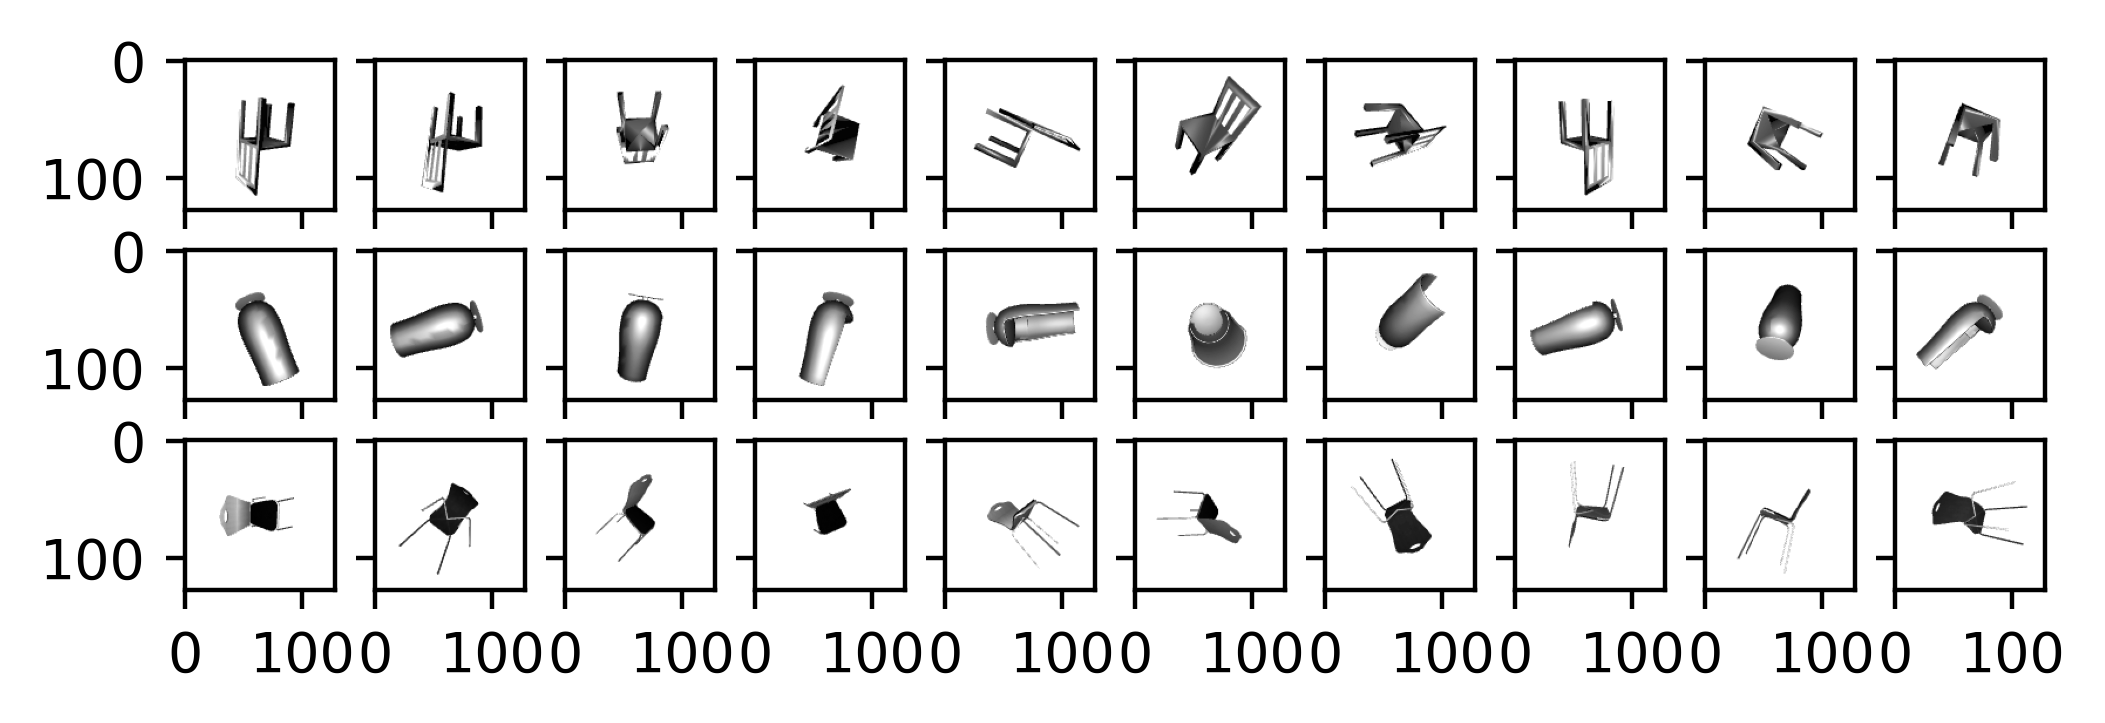

In [152]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

im1 = np.arange(100).reshape((10, 10))
im2 = im1.T
im3 = np.flipud(im1)
im4 = np.fliplr(im2)

fig = plt.figure(dpi = 400)
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(3, 10),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, images):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap = "gray")

plt.savefig("chairs.png", bbox_inches='tight')
plt.show()
